# Geek Brains
# Алгоритмы анализа данных
## ДЗ Урока 6
## Виталий Казанцев

__1.__ Для реализованной модели градиентного бустинга постройте графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделайте выводы о зависимости ошибки от этих параметров.   
__2.__ Модифицируйте реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки примите равным 0.5. Сравните на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

## Реализация алгоритма градиентного бустинга

In [1]:
import numpy as np
import matplotlib

from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from matplotlib import pyplot as plt
from sklearn.datasets import load_diabetes
%matplotlib inline

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

Напишем функцию, реализующую предсказание в градиентном бустинге.

In [4]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и 
    # при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def bias(y, z):
    return (y - z)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=5)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [8]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, n_trees, max_depth):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [9]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Amount trees')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [10]:
# # Число деревьев в ансамбле
# n_trees = 10

# # для простоты примем коэффициенты равными 1
# coefs = [1] * n_trees

# # Максимальная глубина деревьев
# max_depth = 3

# # Шаг
# eta = 0.19

__1.__ Для реализованной модели градиентного бустинга постройте графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделайте выводы о зависимости ошибки от этих параметров. 

In [11]:
def get_coefs(n_trees):
    return [1] * n_trees

In [12]:
def test_gb(etas, n_trees, max_depth, show=False):
    for eta in etas:
        for tree in n_trees:
            coefs = get_coefs(tree)
            for depth in max_depth:
                trees, train_errors, test_errors = gb_fit(tree, depth, X_train, X_test, y_train, y_test, coefs, eta)
                evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, tree, depth)
                print()
                if show:
                    get_error_plot(tree, train_errors, test_errors)

In [13]:
etas = [0.1, 0.01, 0.05]
n_trees = [3, 10, 50]
max_depth = np.arange(3, 8)

Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 16891.054744422196
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 16551.192937366388



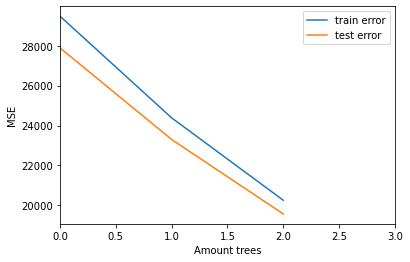

Ошибка алгоритма из 3 деревьев глубиной 4     с шагом 0.1 на тренировочной выборке: 16679.601470285743
Ошибка алгоритма из 3 деревьев глубиной 4     с шагом 0.1 на тестовой выборке: 16511.626587620816



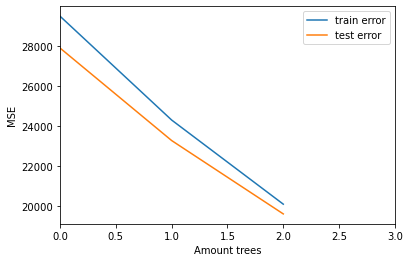

Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 16441.520820111575
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 16501.580539814844



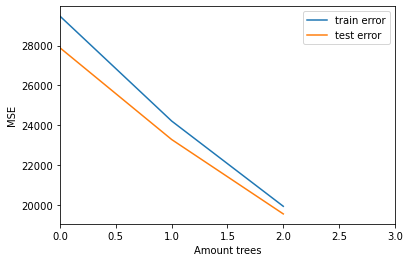

Ошибка алгоритма из 3 деревьев глубиной 6     с шагом 0.1 на тренировочной выборке: 16271.13199386347
Ошибка алгоритма из 3 деревьев глубиной 6     с шагом 0.1 на тестовой выборке: 16586.51902227628



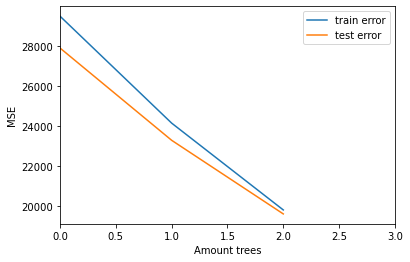

Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 16033.916138404184
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 16582.108127689495



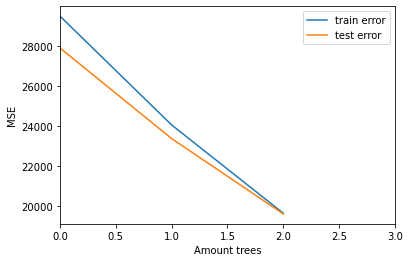

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 5665.452842287153
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 6722.597757501515



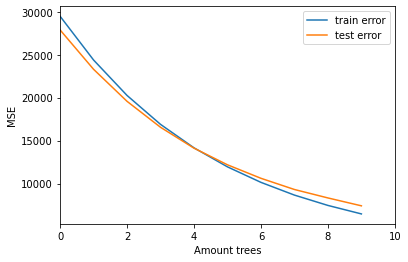

Ошибка алгоритма из 10 деревьев глубиной 4     с шагом 0.1 на тренировочной выборке: 5217.946956129277
Ошибка алгоритма из 10 деревьев глубиной 4     с шагом 0.1 на тестовой выборке: 6696.85415019327



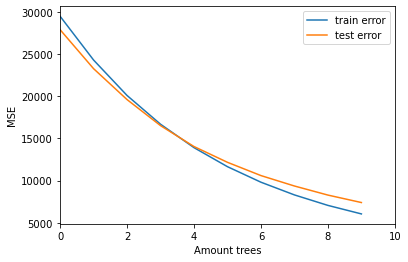

Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 4753.2443281814485
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 6627.888475171654



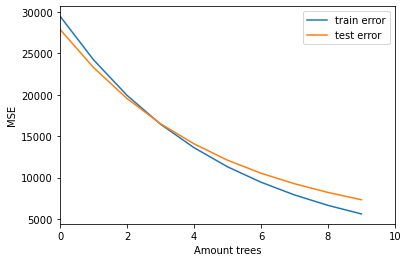

Ошибка алгоритма из 10 деревьев глубиной 6     с шагом 0.1 на тренировочной выборке: 4327.084594668237
Ошибка алгоритма из 10 деревьев глубиной 6     с шагом 0.1 на тестовой выборке: 6825.287438752758



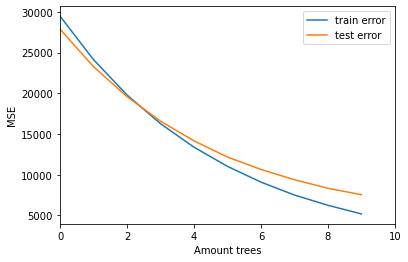

Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 3971.8957359451683
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 7019.938731001566



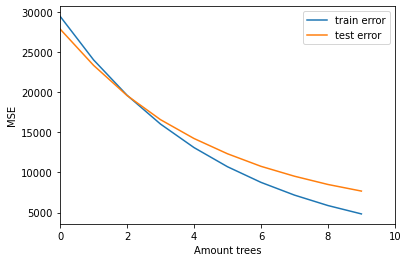

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1343.2014416101256
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3550.7144844722707



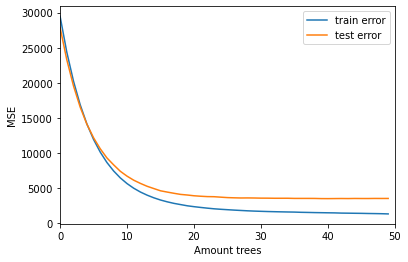

Ошибка алгоритма из 50 деревьев глубиной 4     с шагом 0.1 на тренировочной выборке: 716.8958227078641
Ошибка алгоритма из 50 деревьев глубиной 4     с шагом 0.1 на тестовой выборке: 3764.3108403134584



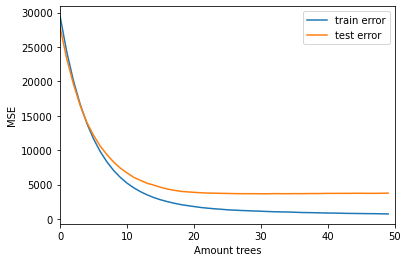

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 282.63950865753975
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3600.6395073729254



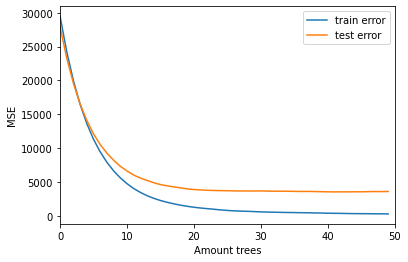

Ошибка алгоритма из 50 деревьев глубиной 6     с шагом 0.1 на тренировочной выборке: 85.13641484107495
Ошибка алгоритма из 50 деревьев глубиной 6     с шагом 0.1 на тестовой выборке: 3981.1823217996903



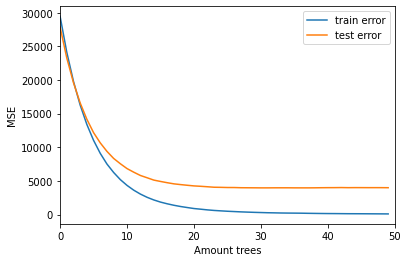

Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 15.51286983159496
Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 4103.665794311111



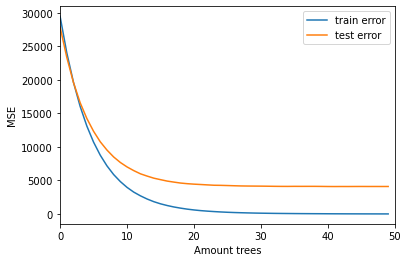

Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 27905.667129206253
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 26471.536991992965



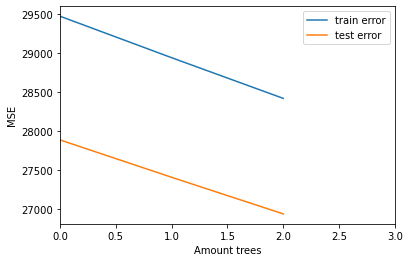

Ошибка алгоритма из 3 деревьев глубиной 4     с шагом 0.01 на тренировочной выборке: 27876.495226404204
Ошибка алгоритма из 3 деревьев глубиной 4     с шагом 0.01 на тестовой выборке: 26456.890707751812



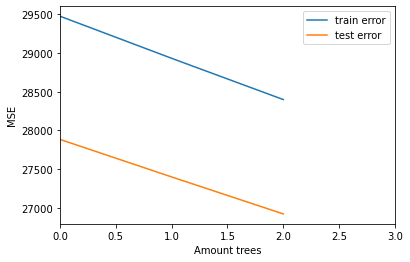

Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 27851.83609679044
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 26466.65362850952



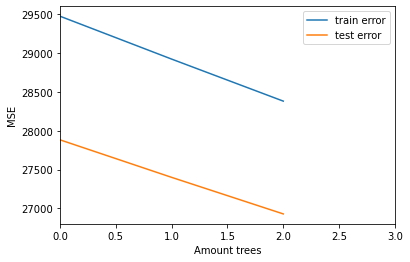

Ошибка алгоритма из 3 деревьев глубиной 6     с шагом 0.01 на тренировочной выборке: 27829.033658325814
Ошибка алгоритма из 3 деревьев глубиной 6     с шагом 0.01 на тестовой выборке: 26464.98257095833



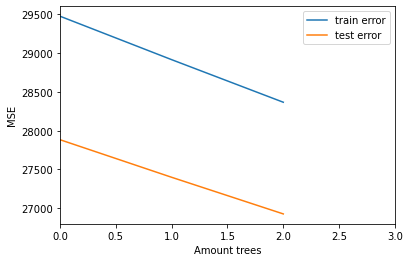

Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 27799.637274566026
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 26488.447343408734



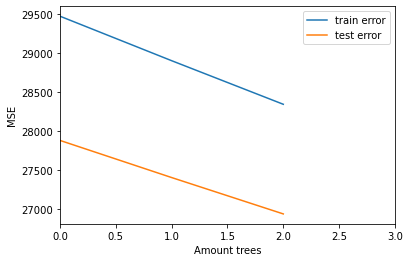

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 24594.04993641569
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 23491.423294090473



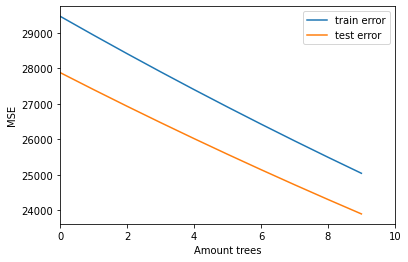

Ошибка алгоритма из 10 деревьев глубиной 4     с шагом 0.01 на тренировочной выборке: 24502.310066648588
Ошибка алгоритма из 10 деревьев глубиной 4     с шагом 0.01 на тестовой выборке: 23480.1003454066



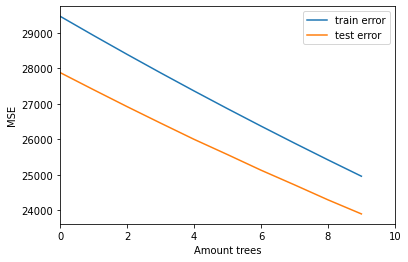

Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 24421.99112222985
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 23461.94388413713



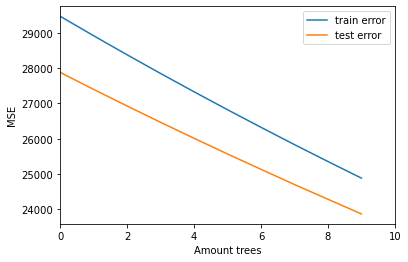

Ошибка алгоритма из 10 деревьев глубиной 6     с шагом 0.01 на тренировочной выборке: 24355.508086274374
Ошибка алгоритма из 10 деревьев глубиной 6     с шагом 0.01 на тестовой выборке: 23486.511723898075



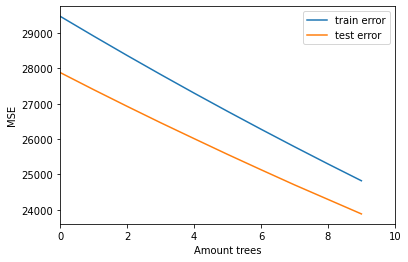

Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 24263.562430222104
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 23510.13428624997



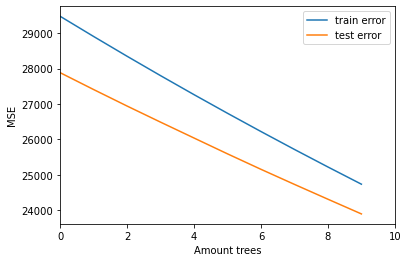

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 12412.992974191167
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 12595.965853810108



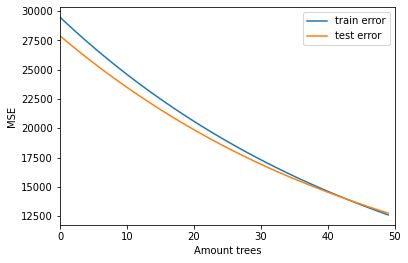

Ошибка алгоритма из 50 деревьев глубиной 4     с шагом 0.01 на тренировочной выборке: 12117.345985309265
Ошибка алгоритма из 50 деревьев глубиной 4     с шагом 0.01 на тестовой выборке: 12629.802344741684



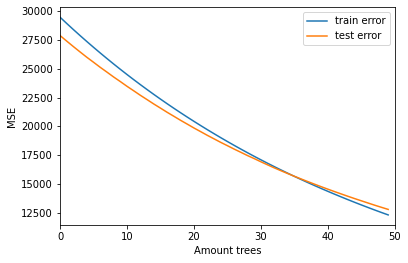

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 11791.057128259794
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 12503.278194645674



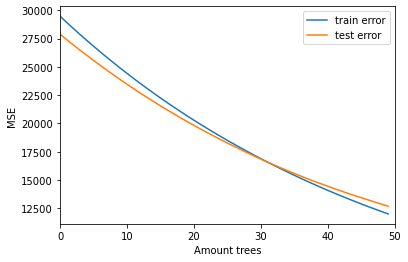

Ошибка алгоритма из 50 деревьев глубиной 6     с шагом 0.01 на тренировочной выборке: 11503.835138508619
Ошибка алгоритма из 50 деревьев глубиной 6     с шагом 0.01 на тестовой выборке: 12533.819549419532



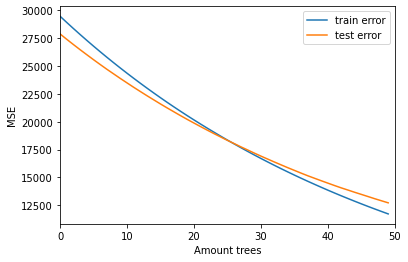

Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 11232.833901277687
Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 12640.336582468732



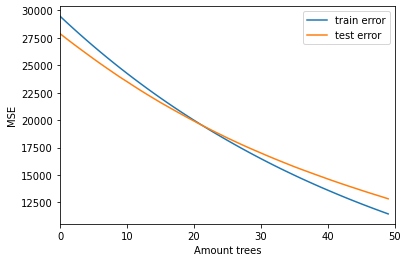

Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.05 на тренировочной выборке: 22374.361368378715
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.05 на тестовой выборке: 21484.581344346112



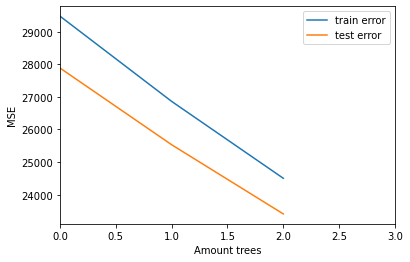

Ошибка алгоритма из 3 деревьев глубиной 4     с шагом 0.05 на тренировочной выборке: 22242.55493969349
Ошибка алгоритма из 3 деревьев глубиной 4     с шагом 0.05 на тестовой выборке: 21469.358615037676



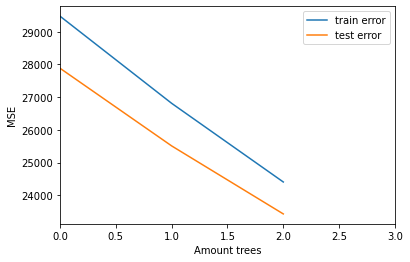

Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.05 на тренировочной выборке: 22117.666680531933
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.05 на тестовой выборке: 21446.055271763445



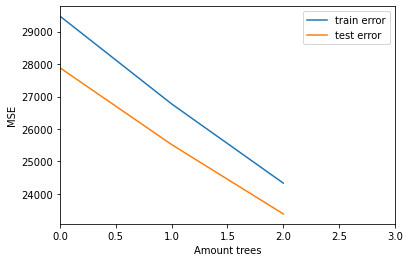

Ошибка алгоритма из 3 деревьев глубиной 6     с шагом 0.05 на тренировочной выборке: 22025.09218767001
Ошибка алгоритма из 3 деревьев глубиной 6     с шагом 0.05 на тестовой выборке: 21445.785183313776



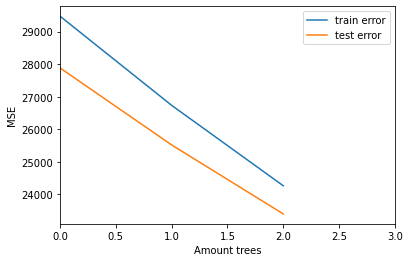

Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.05 на тренировочной выборке: 21892.159914420754
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.05 на тестовой выборке: 21504.111532925985



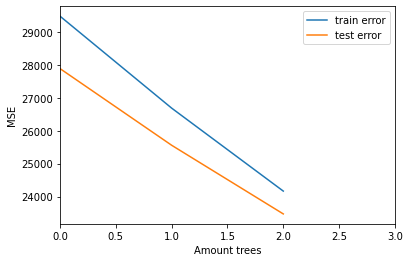

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.05 на тренировочной выборке: 12208.762099022695
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.05 на тестовой выборке: 12415.717249681433



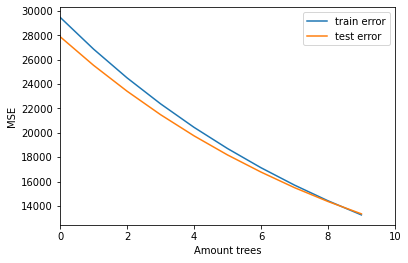

Ошибка алгоритма из 10 деревьев глубиной 4     с шагом 0.05 на тренировочной выборке: 11908.234369826525
Ошибка алгоритма из 10 деревьев глубиной 4     с шагом 0.05 на тестовой выборке: 12496.320441371825



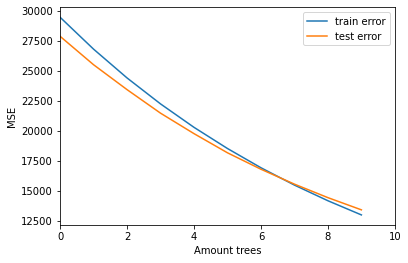

Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.05 на тренировочной выборке: 11576.870374919084
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.05 на тестовой выборке: 12408.488091623858



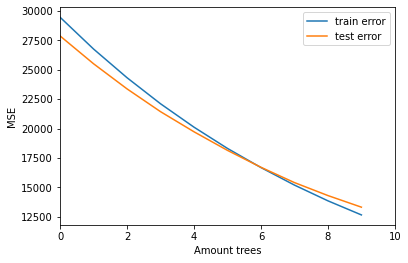

Ошибка алгоритма из 10 деревьев глубиной 6     с шагом 0.05 на тренировочной выборке: 11298.677409769154
Ошибка алгоритма из 10 деревьев глубиной 6     с шагом 0.05 на тестовой выборке: 12363.119999629755



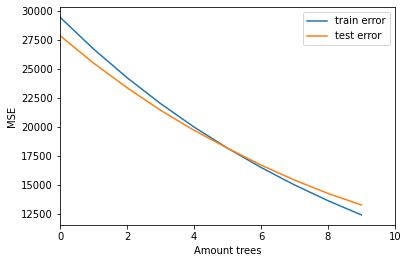

Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.05 на тренировочной выборке: 11016.002635808187
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.05 на тестовой выборке: 12551.956728606563



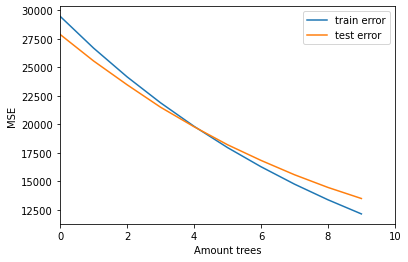

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.05 на тренировочной выборке: 1991.9201664771424
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.05 на тестовой выборке: 3773.684489243399



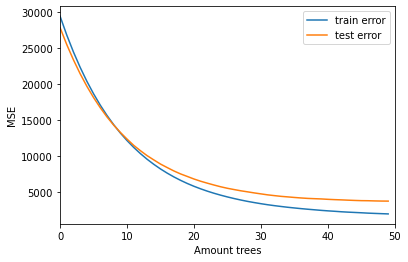

Ошибка алгоритма из 50 деревьев глубиной 4     с шагом 0.05 на тренировочной выборке: 1340.1744156027435
Ошибка алгоритма из 50 деревьев глубиной 4     с шагом 0.05 на тестовой выборке: 3814.9988968756143



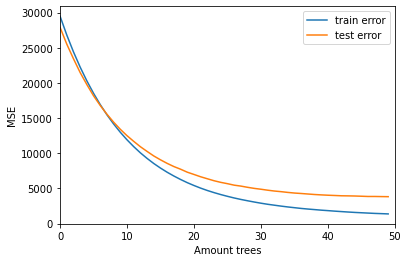

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.05 на тренировочной выборке: 849.5263722683135
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.05 на тестовой выборке: 3760.775269874681



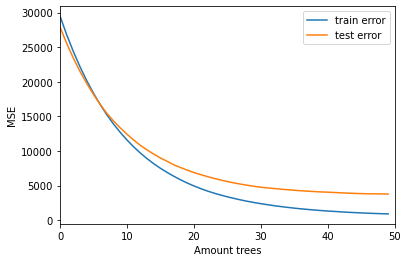

Ошибка алгоритма из 50 деревьев глубиной 6     с шагом 0.05 на тренировочной выборке: 552.7927686051675
Ошибка алгоритма из 50 деревьев глубиной 6     с шагом 0.05 на тестовой выборке: 4056.7561285891197



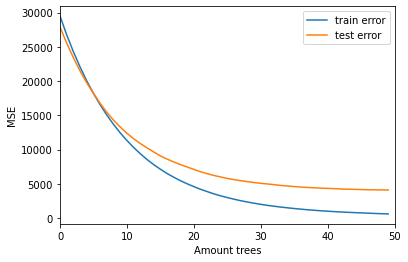

Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.05 на тренировочной выборке: 300.532169220783
Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.05 на тестовой выборке: 4036.4909262935275



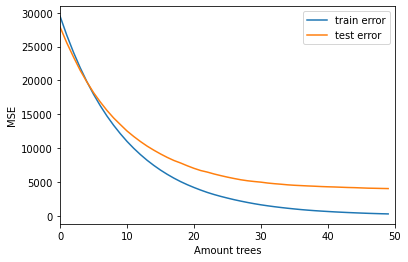

In [14]:
test_gb(etas=etas, n_trees=n_trees, max_depth=max_depth, show=True)

При увеличении количества деревьев и максимальной глубины деревьев уменьшается значение ошибки, однако модель явно склонна к переобучению, что в свою очередь можно попробовать решить подбором параметра шага (eta) 

__2.__ Модифицируйте реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки примите равным 0.5. Сравните на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [15]:
from random import choices

In [16]:
def gb_fit_stoh(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=5)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        idx_list = list(range(0, X_train.shape[0]))
        idx = choices(idx_list, k=X_train.shape[0] // 2)
        idx = list(set(idx))
        
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train[idx], y_train[idx])
            
            train_errors.append(mean_squared_error(y_train[idx], gb_predict(X_train[idx], trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train[idx], trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train[idx], bias(y_train[idx], target))
            
            train_errors.append(mean_squared_error(y_train[idx], gb_predict(X_train[idx], trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [17]:
n_trees = 50
max_depth = 7
eta = 0.1
coefs = [1] * n_trees

In [18]:
trees, train_errors, test_errors = gb_fit_stoh(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [19]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, n_trees=n_trees, max_depth=max_depth)

Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 336.76357140573214
Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 3888.121515819771


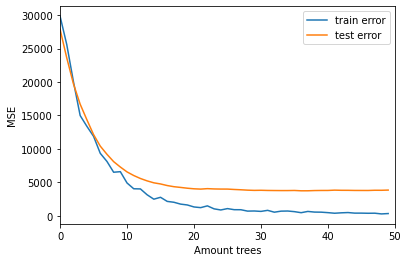

In [20]:
get_error_plot(n_trees, train_errors, test_errors)

Увеличелась ошибка на тренировочной выборке, при этом уменьшилась на тестовой выборке